<a href="https://colab.research.google.com/github/mrafiuddin50/dlaicourse/blob/master/TensorFlow_Weather_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O weather_images.zip https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip 

In [41]:
import tensorflow as tf
from zipfile import ZipFile
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import shutil
import random

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%matplotlib inline

In [42]:
SEED = 3212
np.random.seed(SEED)
random.seed(SEED)

In [5]:
with ZipFile('weather_images.zip','r') as zip:
  zip.extractall()

In [6]:
with ZipFile('dataset2.zip','r') as zip:
  zip.extractall()

In [7]:
!mv dataset2 weather_images

In [9]:
filelist = os.listdir('weather_images')


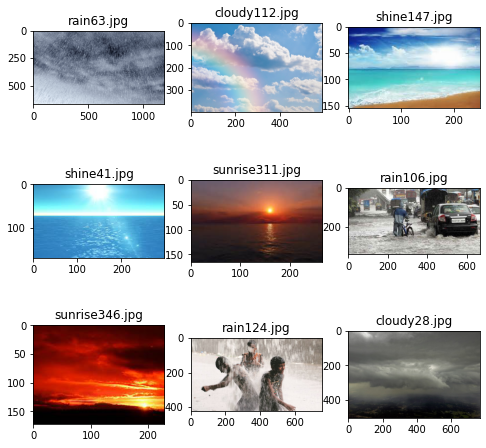

In [33]:
fig = plt.figure(figsize=(8,8))
for i in range(0,9):
  ax = fig.add_subplot(3,3,i+1)
  file = np.random.choice(filelist,1)[0]
  ax.imshow(mpimg.imread('weather_images/'+file))
  ax.set_title(file)

In [98]:
os.mkdir('weather_images/training/')
os.mkdir('weather_images/testing/')

os.mkdir('weather_images/training/cloudy')
os.mkdir('weather_images/training/rain')
os.mkdir('weather_images/training/shine')
os.mkdir('weather_images/training/sunrise')

os.mkdir('weather_images/testing/cloudy')
os.mkdir('weather_images/testing/rain')
os.mkdir('weather_images/testing/shine')
os.mkdir('weather_images/testing/sunrise')

In [111]:
def split_files(SOURCE_DIR, TRAIN_DIR, TEST_DIR, CAT, SPLIT_SIZE):
  
  filelist = os.listdir(SOURCE_DIR)
  filelist = [fname for fname in filelist if CAT in fname if '.jpg' in fname]
  filelist_randomized = random.sample(filelist,len(filelist))
  slice_point = int(SPLIT_SIZE*len(filelist_randomized))
  
  train_files = filelist_randomized[:slice_point]
  test_files = filelist_randomized[slice_point:]
  
  for file in train_files:
    if os.path.getsize(SOURCE_DIR+file) > 0:
      shutil.copyfile(SOURCE_DIR+file,TRAIN_DIR+CAT+'/'+file)

  for file in test_files:
    if os.path.getsize(SOURCE_DIR+file) > 0:
      shutil.copyfile(SOURCE_DIR+file,TEST_DIR+CAT+'/'+file)    
    

In [112]:
categories = ['cloudy','rain','shine','sunrise']

for cat in categories:
  split_files('weather_images/','weather_images/training/','weather_images/testing/',cat,0.9)

In [137]:
model = tf.keras.Sequential([
                 tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'),
                 tf.keras.layers.MaxPooling2D(2,2),
                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                 tf.keras.layers.MaxPool2D(2,2),
                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                 tf.keras.layers.MaxPooling2D(2,2),
                 tf.keras.layers.Flatten(),
                 tf.keras.layers.Dense(512,activation='relu'),
                 tf.keras.layers.Dense(4,activation='softmax')
                 ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [138]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [131]:
train_dir = 'weather_images/training/'
validation_dir = 'weather_images/testing/'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 8,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

Found 1008 images belonging to 4 classes.
Found 114 images belonging to 4 classes.


In [139]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 63,
            epochs = 20,
            validation_steps = 14,
            verbose = 1)

Epoch 1/20
63/63 [==============================] - 42s 654ms/step - loss: 5.7471 - accuracy: 0.4077 - val_loss: 0.8617 - val_accuracy: 0.6964
Epoch 2/20
63/63 [==============================] - 41s 648ms/step - loss: 0.9191 - accuracy: 0.6076 - val_loss: 0.9731 - val_accuracy: 0.5446
Epoch 3/20
63/63 [==============================] - 41s 643ms/step - loss: 0.7779 - accuracy: 0.7188 - val_loss: 0.7778 - val_accuracy: 0.6786
Epoch 4/20
63/63 [==============================] - 41s 647ms/step - loss: 0.6637 - accuracy: 0.7239 - val_loss: 0.7851 - val_accuracy: 0.6964
Epoch 5/20
63/63 [==============================] - 40s 637ms/step - loss: 0.5078 - accuracy: 0.7995 - val_loss: 0.4893 - val_accuracy: 0.7946
Epoch 6/20
63/63 [==============================] - 41s 641ms/step - loss: 0.5033 - accuracy: 0.8184 - val_loss: 0.5849 - val_accuracy: 0.7679
Epoch 7/20
63/63 [==============================] - 41s 644ms/step - loss: 0.4478 - accuracy: 0.8267 - val_loss: 0.4791 - val_accuracy: 0.7946

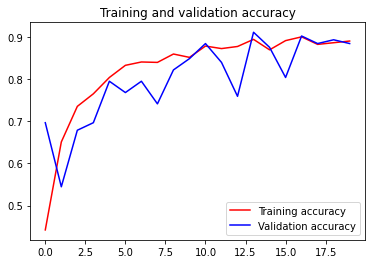

<Figure size 432x288 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [161]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  img = tf.io.read_file(fn)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [150,150])
  img = tf.expand_dims(img,axis=0)
  print(model.predict(img))

Saving rainy_day.jpg to rainy_day (2).jpg
[[0. 0. 1. 0.]]


In [151]:
model.predict_classes(img)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])

In [154]:
model.predict(img)

array([[0., 0., 1., 0.]], dtype=float32)

In [157]:
train_generator.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}